Part 1: CNN Autoencoder

Task
1. Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):
o Use convolutional layers in the encoder to extract spatial features.
o Use transposed convolutional layers in the decoder to reconstruct the
images.
o Visualize the input and reconstructed images.
2. Evaluate the autoencoder’s ability to compress data:
o Measure the Mean Squared Error (MSE) between the original and
reconstructed images.
o Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Dense, Reshape
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
class Autoencoder(Model):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = tf.keras.Sequential([
            Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            Flatten(),
            Dense(16, activation='relu')  # Latent space (bottleneck layer)
        ])

        # Decoder
        self.decoder = tf.keras.Sequential([
            Dense(7 * 7 * 64, activation='relu'),
            Reshape((7, 7, 64)),
            Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

In [4]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 0.0769 - val_loss: 0.0181
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0172 - val_loss: 0.0141
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0139 - val_loss: 0.0124
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0124 - val_loss: 0.0113
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0113 - val_loss: 0.0108
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0107 - val_loss: 0.0102
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0093 - val_loss: 0.0092


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


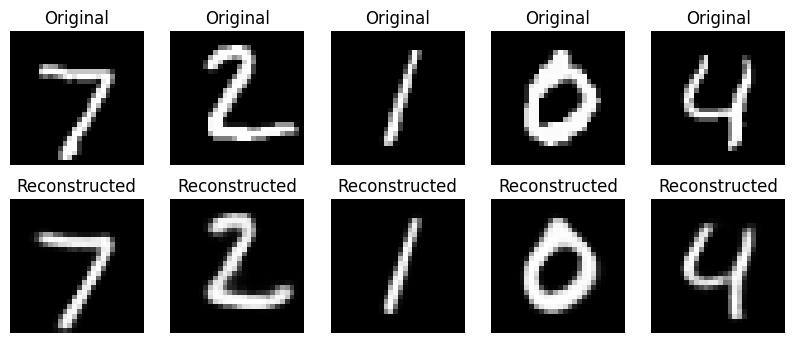

In [5]:
def display_images(original, reconstructed):
    plt.figure(figsize=(10, 4))
    for i in range(5):
        # Original
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

    plt.show()

# Predict and display the reconstructed images
reconstructed = autoencoder.predict(x_test)
display_images(x_test, reconstructed)

In [6]:
mse = tf.keras.losses.MeanSquaredError()
mse_value = mse(x_test, reconstructed).numpy()
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 0.009164063259959221


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


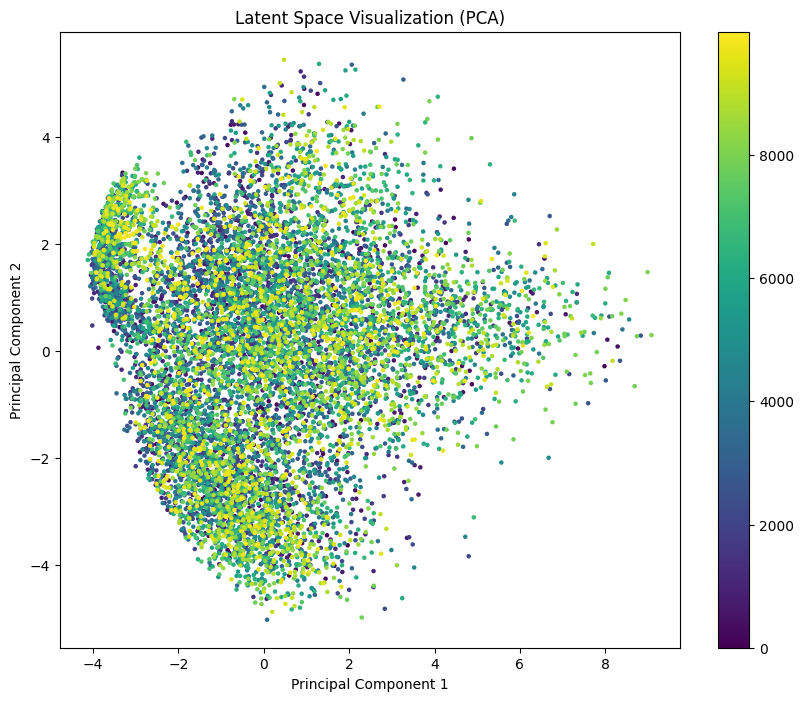

In [7]:
# Extract latent space representations
latent_space = autoencoder.predict(x_test)

# Flatten the latent space
latent_space_flat = latent_space.reshape(latent_space.shape[0], -1)

# Create figure for visualization
plt.figure(figsize=(10, 8))

# Apply PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_space_flat)

# Create scatter plot
plt.scatter(latent_pca[:, 0], latent_pca[:, 1],
            c=np.arange(len(latent_pca)), cmap='viridis', s=5)

# Add color bar and labels
plt.colorbar()
plt.title("Latent Space Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Key Questions:
* 1. How does the CNN autoencoder perform in reconstructing images?

A low MSE indicates that the model is effectively learning the features necessary to reconstruct images with minimal error. A low MSE suggests that the reconstructed images are quite close to the original ones, with only minor discrepancies that the model couldn't fully capture.

* 2. What insights do you gain from visualizing the latent space?

Using PCA to visualize the latent space is a great choice for me as it revealed key structural relationships within the compressed features. By reducing the dimensionality of the latent space, PCA helped highlight patterns, such as clusters or separable regions, that are otherwise diﬃcult to see.

Part 2: LSTM Autoencoder
Task

1. Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-series data or text sequences):

* Use LSTM layers in the encoder to capture temporal dependencies.
* Use LSTM layers in the decoder to reconstruct the sequences.
* Plot and compare the original and reconstructed sequences.
2. Evaluate the autoencoder’s performance:
* Calculate the reconstruction loss using MSE.
* Use the encoder’s latent representations for downstream tasks, like
sequence classification.

In [9]:
import pandas as pd
data2 = pd.read_csv("/content/HistoricalQuotes.csv") # Apple Stocks Data
data2.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [10]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2[' Close/Last'] = data2[' Close/Last'].str.replace('$',
'').astype(float).values
data2[' Open'] = data2[' Open'].str.replace('$',
'').astype(float).values
data2[' High'] = data2[' High'].str.replace('$',
'').astype(float).values
data2[' Low'] = data2[' Low'].str.replace('$',
'').astype(float).values
data2 = data2[['Date', ' Close/Last']].sort_values('Date')
data2.set_index('Date', inplace=True)
data2.head()

,Close/Last
Date,
2010-03-01,29.8557
2010-03-02,29.8357
2010-03-03,29.9043
2010-03-04,30.1014
2010-03-05,31.2786


In [11]:

from sklearn.preprocessing import MinMaxScaler

# Normalize
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data2[[' Close/Last']])
scaled_data[:5]

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       [8.93516807e-04],
       [4.85229733e-03]])

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

timesteps = 15
data_X = []
data_Y = []


for i in range(len(scaled_data) - timesteps - 1):
    _x = scaled_data[i:(i + timesteps)]
    _y = scaled_data[i + timesteps]
    data_X.append(_x)
    data_Y.append(_y)

data_X, data_Y = np.array(data_X), np.array(data_Y)

# Train-test split
train_size = int(len(data_X) * 0.8)
test_size = len(data_X) - train_size
train_X, test_X = data_X[0:train_size], data_X[train_size:]
train_Y, test_Y = data_Y[0:train_size], data_Y[train_size:]

# Reshape input for LSTM: (samples, timesteps, features)
train_X = np.reshape(train_X, (train_X.shape[0], timesteps, 1))
test_X = np.reshape(test_X, (test_X.shape[0], timesteps, 1))

# LSTM Encoder
encoder_inputs = keras.Input(shape=(timesteps, 1))
x = layers.LSTM(64, return_sequences=True)(encoder_inputs)
x = layers.LSTM(32, return_sequences=False)(x)
encoder_outputs = x  # Latent representation
encoder = keras.Model(encoder_inputs, encoder_outputs, name="encoder")

# Display the model summary
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 15, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 15, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,312 (114.50 KB)

 Trainable params: 29,312 (114.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Use LSTM layers in the decoder to reconstruct the sequences.
decoder_inputs = keras.Input(shape=(32,))
x = layers.RepeatVector(timesteps)(decoder_inputs)
x = layers.LSTM(32, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
decoder_outputs = layers.TimeDistributed(layers.Dense(1))(x)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 15, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 15, 32)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 15, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 15, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,217 (129.75 KB)

 Trainable params: 33,217 (129.75 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Combine the encoder and decoder into the autoencoder model
autoencoder = keras.Sequential([encoder, decoder])

# Display the summary of the autoencoder to check the number of parameters
autoencoder.summary()

# Compile the autoencoder model
autoencoder.compile(optimizer="adam", loss="mse")

# Fit the autoencoder model on the training data
history = autoencoder.fit(
    train_X, train_X,  # Autoencoder target is the input itself
    epochs=50,
    batch_size=32,
    validation_data=(test_X, test_X)  # Validation with the test set
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder (Functional)                 │ (None, 32)                  │          29,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 15, 1)               │          33,217 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0197 - val_loss: 0.0251
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - val_loss: 0.0169
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.5464e-04 - val_loss: 0.0162
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7265e-04 - val_loss: 0.0131
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1221e-04 - val_loss: 0.0109
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.8535e-05 - val_loss: 0.0119
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 8.5279e-05 - val_loss: 0.0102
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0419e-04 - val_loss: 0.0112
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.9881e-05 - val_loss: 0.0099
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.7760e-05 - val_loss: 0.0100
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 7.9030e-05 - val_loss: 0.0090
Epoch 12/50
63/63 ━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


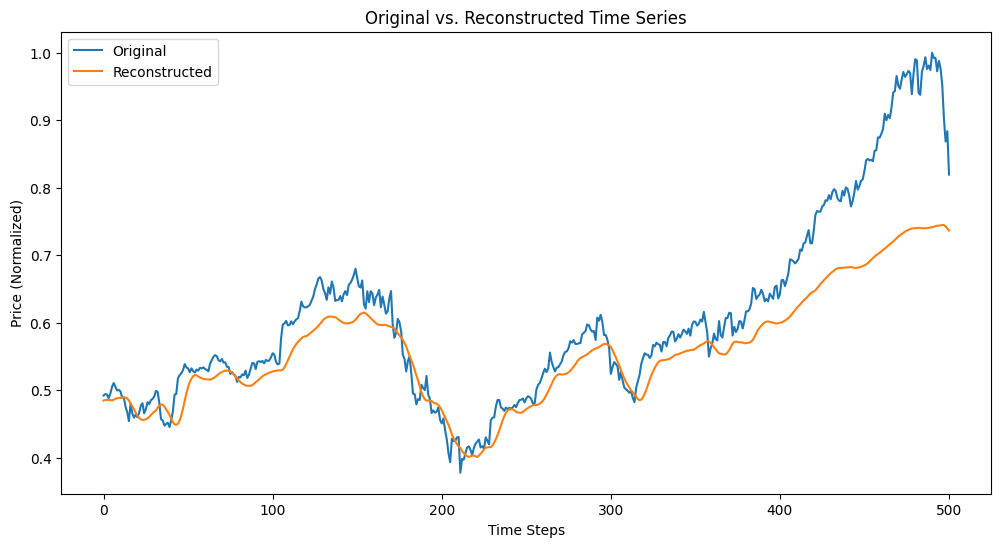

In [15]:
import matplotlib.pyplot as plt

predictions = autoencoder.predict(test_X)
# Plot original vs reconstructed sequences
plt.figure(figsize=(12, 6))
plt.plot(test_Y, label='Original')
plt.plot(predictions[:, -1, 0], label='Reconstructed')
plt.legend()
plt.title('Original vs. Reconstructed Time Series')
plt.xlabel('Time Steps')
plt.ylabel('Price (Normalized)')
plt.show()

In [16]:
# Calculate the reconstruction loss using MSE.
reconstruction_loss = autoencoder.evaluate(test_X, test_X, verbose=0)
print("Reconstruction Loss (MSE):", reconstruction_loss)

Reconstruction Loss (MSE): 0.005494897719472647


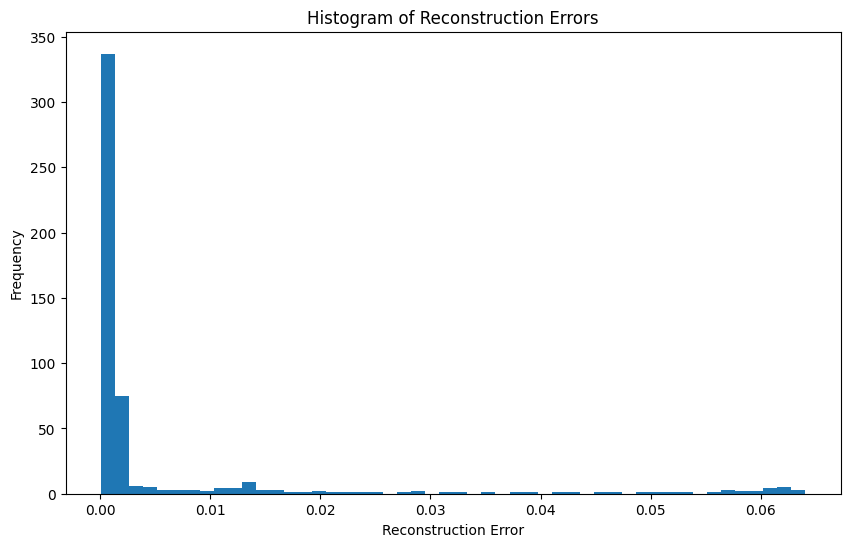

<Figure size 2000x400 with 0 Axes>

In [17]:
# Calculate the Mean Squared Error (MSE) for reconstruction errors
mse = np.mean(np.power(test_X - predictions, 2), axis=(1, 2))  # Average over timesteps and features

# Plot the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.show()

# Set a threshold for anomaly detection (using the maximum MSE as the threshold)
threshold = np.max(mse)

# Find the indices of the anomalous data points
anomalies = np.where(mse > threshold)[0]

# Plot the anomalous data points (up to a maximum of 10)
n = min(len(anomalies), 10)
plt.figure(figsize=(20, 4))
for i in range(n):
    # Plot the original anomalous data points
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[anomalies[i]].reshape(28, 28))  # Assuming the data is 28x28 images
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Plot the reconstructed images corresponding to the anomalies
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[anomalies[i]].reshape(28, 28))  # Assuming the predictions are also 28x28 images
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


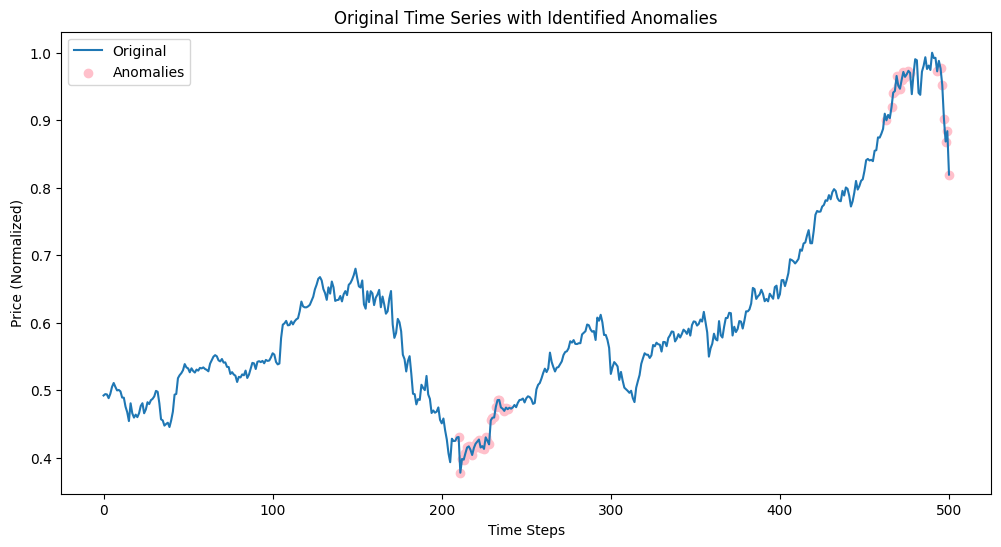

In [18]:
from sklearn.ensemble import IsolationForest

# Use the encoder’s latent representations for downstream tasks, like anomaly identification
latent_representations = encoder.predict(test_X)

# Train an Isolation Forest on the latent representations
model = IsolationForest(contamination=0.1)  # 10% contamination as threshold
model.fit(latent_representations)

# Get anomaly scores and determine which points are anomalies
anomaly_scores = model.decision_function(latent_representations)
anomalies = anomaly_scores < 0  # Anomalies have negative scores in Isolation Forest

# Plot the original time series and mark the identified anomalies
plt.figure(figsize=(12, 6))
plt.plot(test_Y, label='Original')

# Scatter plot for identified anomalies
plt.scatter(np.arange(len(test_Y))[anomalies], test_Y[anomalies], color='pink', label='Anomalies')

# Add labels, legend, and title to the plot
plt.legend()
plt.title('Original Time Series with Identified Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price (Normalized)')
plt.show()


#1.How well does the LSTM autoencoder reconstruct the sequences?
An MSE of 0.00628 in the LSTM autoencoder implies that the model is effectively capturing the temporal patterns in the sequence data, leading to accurate reconstructions with minimal error. This low reconstruction loss suggests that the LSTM autoencoder is able to preserve the essential features of the sequences while filtering out noise.

#2.How does the choice of latent space dimensionality affect reconstruction quality and compression?
The dimensionality of the latent space directly impacts both the model's ability to reconstruct the input sequences and the degree of data compression:

Reconstruction Quality: A higher-dimensional latent space usually allows the model to retain more detailed information from the input sequences, often leading to better reconstructions. When the dimensionality is too low, there's a risk of losing critical information, causing higher reconstruction errors and possibly missing key patterns or variations in the sequence data.

Compression: Reducing latent space dimensionality increases compression by forcing the model to retain only the most essential features, effectively filtering out less important details. However, over-compression (i.e., a too low-dimensional latent space) may limit the model's ability to represent the full complexity of the data. Conversely, a larger latent space improves reconstruction quality but reduces compression efficiency.

# Part 3: Comparison and Discussion

Compare the performance of CNN and LSTM autoencoders:

**1.Discuss their efficiency in feature extraction for spatial vs. sequential data.**

* CNN autoencoders are highly efficient for feature extraction in spatial data, as their convolutional layers excel at capturing spatial hierarchies and localized patterns within images. By focusing on local features through filters, CNNs can effectively represent spatial structures and textures, making them suitable for tasks like image compression, object recognition, and anomaly detection in visual data.

* LSTM autoencoders, on the other hand, are specialized for sequential data due to their ability to capture temporal dependencies and relationships over time. LSTMs inherently process data sequentially, allowing them to retain information from previous time steps and thus model long-term dependencies effectively. They are particularly efficient for extracting features in data where temporal patterns are crucial, such as time-series data, natural language, and audio signals.

**2.Analyze the quality of dimensionality reduction for both models.**

The CNN autoencoder’s dimensionality reduction tends to capture high-level spatial features while discarding less essential details. Its ability to produce clear clusters in the latent space indicates effective compression for spatial data.

In contrast, the dimensionality reduction in an LSTM autoencoder captures the temporal dependencies across sequences, but it often requires a larger latent space to retain sufficient information for high-quality reconstructions. The LSTM’s latent space may be less clustered than that of a CNN, as sequential data often exhibits more complex and overlapping patterns.

**3.Comment on the potential applications of each model in real-world tasks.**

CNN Autoencoder:

* Image Compression and Reconstruction: Compresses and reconstructs images by reducing spatial data to its core features.
* Anomaly Detection: Identifies irregularities in spatial data (e.g., detecting unusual patterns in medical images).
* Data Augmentation and Transfer Learning: Utilizes the latent space features for transfer learning, allowing the extracted features to be useful for other computer vision tasks.

LSTM Autoencoder:

* Anomaly Detection in Time-Series Data: Detects deviations in data such as network traffic, stock prices, or sensor readings.
* Predictive Maintenance: Identifies patterns in equipment performance data that indicate a likelihood of failure.
* Natural Language Processing: Captures temporal patterns in sequential data for tasks like language modeling or sequence prediction.